<a href="https://colab.research.google.com/github/tomonari-masada/course2022-sml/blob/main/05_nearest_neighbors_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. k近傍法（続）

## 5.1 準備

### 5.1.1 インポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

### 5.1.2 データファイルのアップロード

* `lifesat_extended.csv`をアップロードする。

In [2]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended.csv


{'lifesat_extended.csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,1223

### 5.1.3 データファイルの読み込み
* 今回は、ファイルを読み込むときに、国名をインデックスに設定してしまう。
 * index_col引数を使っている。

In [3]:
df = pd.read_csv('lifesat_extended.csv', index_col=0)

In [4]:
df

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


In [5]:
df.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,19.241379,3.572414,7.248276,2.400000,77.103448,8.791724,65.896552,1.596552,24302.137931,42052.000000,...,36606.551724,90.068966,1.682759,67.655172,500.931034,14.890345,70.965517,82.896552,17.727586,33391.749138
std,7.224241,1.545476,2.718406,3.801034,15.062595,8.278210,7.788934,2.443867,6133.657664,31325.680935,...,11696.416895,4.795318,0.445669,15.625702,21.142258,0.551333,11.216960,10.624583,1.176829,14650.076056
min,9.000000,1.300000,2.500000,0.000000,34.000000,0.160000,49.000000,0.300000,14095.000000,3251.000000,...,16919.000000,72.000000,0.900000,30.000000,462.000000,13.420000,52.000000,56.000000,15.800000,9054.914000
25%,13.000000,2.200000,5.100000,0.200000,73.000000,3.660000,60.000000,0.600000,19326.000000,18465.000000,...,25503.000000,89.000000,1.400000,65.000000,487.000000,14.610000,64.000000,78.000000,16.800000,19121.592000
50%,18.000000,3.600000,7.100000,0.700000,82.000000,6.160000,67.000000,0.900000,23965.000000,43045.000000,...,36354.000000,90.000000,1.700000,69.000000,500.000000,14.910000,69.000000,85.000000,17.600000,37044.891000
75%,24.000000,4.900000,10.300000,3.200000,88.000000,12.250000,72.000000,1.300000,28307.000000,54987.000000,...,46911.000000,94.000000,1.900000,77.000000,516.000000,15.110000,77.000000,91.000000,18.600000,43724.031000
max,35.000000,6.600000,11.500000,15.100000,94.000000,40.860000,82.000000,12.800000,41355.000000,145769.000000,...,56340.000000,96.000000,2.500000,90.000000,542.000000,16.060000,93.000000,97.000000,19.800000,55805.204000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              29 non-null     float64
 1   Assault rate                               29 non-null     float64
 2   Consultation on rule-making                29 non-null     float64
 3   Dwellings without basic facilities         29 non-null     float64
 4   Educational attainment                     29 non-null     float64
 5   Employees working very long hours          29 non-null     float64
 6   Employment rate                            29 non-null     float64
 7   Homicide rate                              29 non-null     float64
 8   Household net adjusted disposable income   29 non-null     float64
 9   Household net financial wealth             29 non-null     float64
 10  Housing expenditu

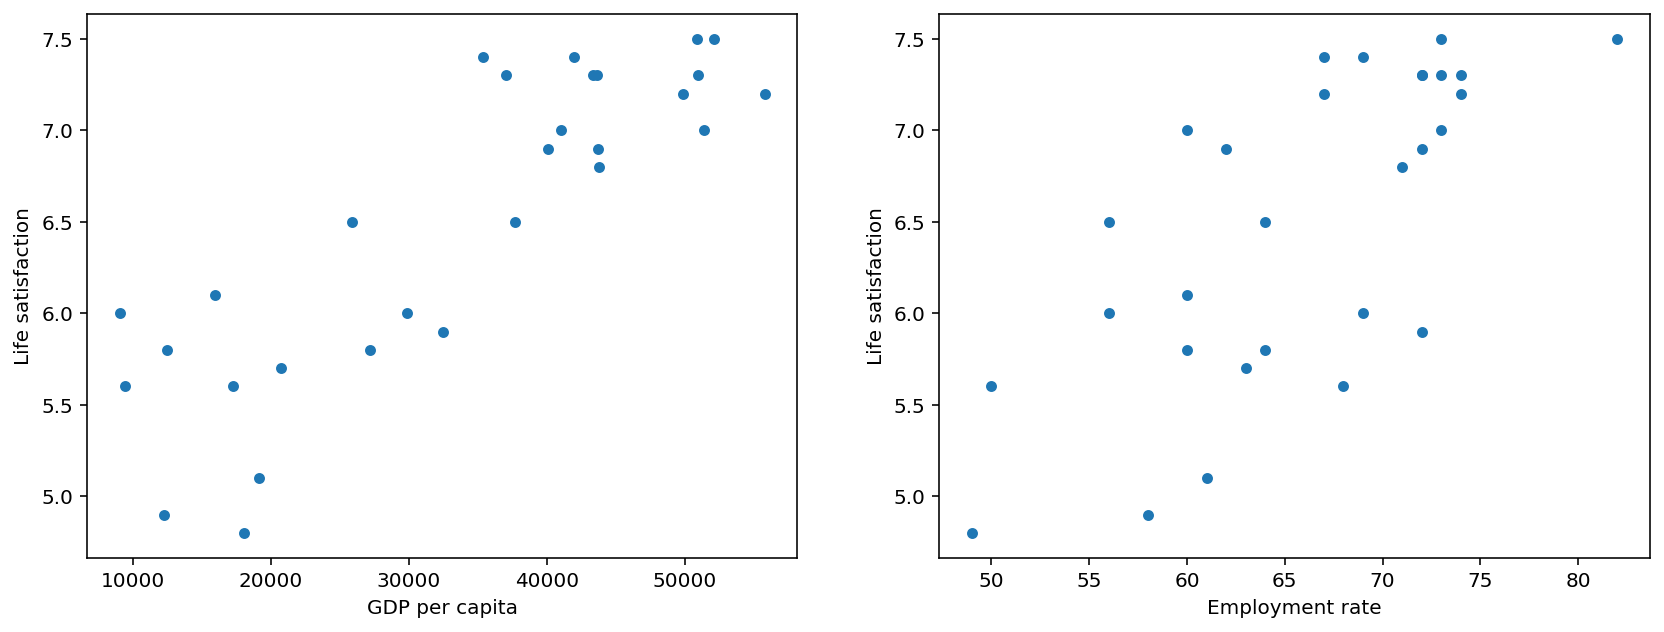

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax[0])
df.plot(kind='scatter', x='Employment rate', y='Life satisfaction', ax=ax[1]);

In [8]:
X = df[['GDP per capita', 'Employment rate']]
y = df['Life satisfaction']

In [13]:
X

,GDP per capita,Employment rate
Country,,
Russia,9054.914,69.0
Turkey,9437.372,50.0
Hungary,12239.894,58.0
Poland,12495.334,60.0
Slovak Republic,15991.736,60.0
Estonia,17288.083,68.0
Greece,18064.288,49.0
Portugal,19121.592,61.0
Slovenia,20732.482,63.0


## 5.2 二つの特徴量を同時に使う
* 前回は、一人当たりのGDPと、雇用率を、別々に使った。
* 今回は、これら二つの特徴量を、同時に使いたい。
* つまり、(一人当たりのGDP, 雇用率)から生活満足度を予測したい。
* 今回も、日本の生活満足度を予測することが目標。

### 5.2.1 演習

* 演習問題5-1: 日本と韓国の距離を、一人当たりのGDPと雇用率を同時に使って計算したい。しかし、下に示す距離の計算方法には、問題がある。どのような問題があるか。

In [12]:
print(np.linalg.norm(X.loc['Japan'] - X.loc['Korea']))

5290.354048747964


* 演習問題5-2: 上で見つけた問題を解決した上で、あらためて、日本と韓国の距離を求めてみよう。

## 5.3 訓練データ/検証データ/テストデータ


### 5.3.1 テストデータ
* 最終的にそれについて予測を行なうことで、手法の評価をおこないたいデータを、テストデータと呼ぶ。
* よって、今回は、日本のデータが、テストデータになる。
 * 普通は、テストデータは今回のように一つだけではなく、複数、用意する。
 * 今回は、データ数そのものが29個と少ないため、テストデータは一つだけにしている。

### 5.3.2 検証データ

* 最適な近傍の個数kを、どうやって求めたらいいだろうか。
* kの値を変えながら、日本の生活満足度を予測し、予測誤差を見ながらkを決めるのでは、カンニングしていることになる。
 * テストデータでの評価は、最終評価なので、最後に一度行うだけ。
* 日本の生活満足度を予測する前に、どのようにしてkを決めればいいだろうか。


* そこで、テストデータ以外のデータを使って、予測問題を解く。

* テストデータ以外のデータの中から、国を一つ選んで（例えば韓国）、その国について予測をしてみる。
* k近傍法の場合のkのように、チューニングしなければならないパラメータを決めるために使うデータを、検証データと呼ぶ。
 * 本当にそれについて予測をしたいデータは、テストデータ。
 * 検証(validation)のためにそれについて予測をおこなうデータが、検証データ。
* 検証データについて予測を行うことで、kの値を変えたとき予測性能がどう変わるか、調べる。
 * 検証データも、普通は、複数個用意する。
 * 今回は、データ数そのものが少ないため、検証データも一つだけにしている。


### 5.3.3 訓練データ
* そもそも予測を実行するために使うデータを、訓練データと呼ぶ。
 * k近傍法では、k個の近傍を見つけるデータが、訓練データになる。

## 5.4 検証データを使った最適なkの決定
* ここでは、韓国を検証データとして使う。
* 日本はテストデータなので、最初に除外しておく。
* そして、韓国の生活満足度を予測し、最も良い予測値を与えるkがいくらか、調べる。

### 5.4.1 演習

* 演習問題5-3: 日本を除去したデータフレームを作ろう。

* 演習問題5-4: 韓国の生活満足度を予測し、最も良い予測値を与えるkを調べよう。

* 演習問題5-5: こうして調べたkを使って、日本の生活満足度を予測し、予測誤差を求めよう。

## 5.5 ‎leave-one-out交差検証 (1)
* 上では、韓国を検証データとして使った。
* しかし、韓国以外の国を検証データとしても構わないはずである。
* そこで、日本以外の国について、その一つ一つを検証データとした場合の、それぞれの最適なkの値を求めてみる。

### 5.5.1 演習

* 演習問題5-6: 上で韓国について行ったことと同じことを、他の国についても実行し、最適なkの値がどのくらい違ってくるものか、見てみよう。

* 最適なkを、どのようにして決めればいいだろうか？
 * 例えば、各国について得られたkの平均をとることが考えられるが、これは良い方法と言えるだろうか？

## 5.6 ‎leave-one-out交差検証 (2)
* 上では、日本を除く国を、一つずつ順番に検証データとして、最適なkを求めた。
* しかし、こうして国ごとに求められたkを、どうやってまとめあげるのか、疑問が残った。
 * それらkの平均をとる、という方法は、何かおかしい感じがする。
 * 最頻値の方が、まだましであろう。
* 最適なkを決める、もっと良い方法はないだろうか？

### 5.6.1 演習

* 演習問題5-7: 韓国を検証データとする。つまり、韓国について予測を行なう。k=1から27まで変えたとき、それぞれ予測誤差がいくらになるか、求めてみよう。

* 演習問題5-8: 縦が国名、横がkの値の表を、データフレームとして作り、日本を除く28カ国の国を検証データとしたとき、各々のkの値で予測誤差がいくらになるかで埋めてみよう。

* 演習問題5-9: 上で作った表で、それぞれのkの値について、予測誤差の平均値を求めてみよう。

* 演習問題5-10: 上で求めた予測誤差の平均値を、最も小さくするkの値は、いくらになるか。

* 演習問題5-11: こうして求めた最適なkを使って、元に戻って、日本の生活満足度の予測をしてみよう。